In [102]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
import pyspark.sql.functions as F
import pyspark.sql.types as T

spark = (
    SparkSession.builder.appName("EDA_Charts_App")
    .config("spark.executor.memory", "1G")
    .config("spark.executor.cores", "1")
    .config("spark.cores.max", "3")
    .config("spark.master", "spark://master:7077")
    .getOrCreate()
)

In [103]:
spark

In [104]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [107]:
df = spark.read.csv("/proiect/vehicle_claims.csv", inferSchema=True, header=True)

In [108]:
df = df.filter("Gearbox IN ('Automatic', 'Manual')")

In [109]:
bd=df.toPandas()

In [110]:
print(type(bd))

<class 'pandas.core.frame.DataFrame'>


In [111]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='repair_cost'>

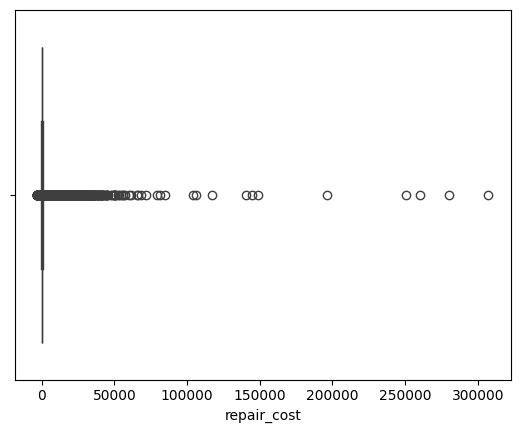

In [112]:
sns.boxplot(x=bd['repair_cost'])

<Axes: xlabel='Gearbox', ylabel='repair_cost'>

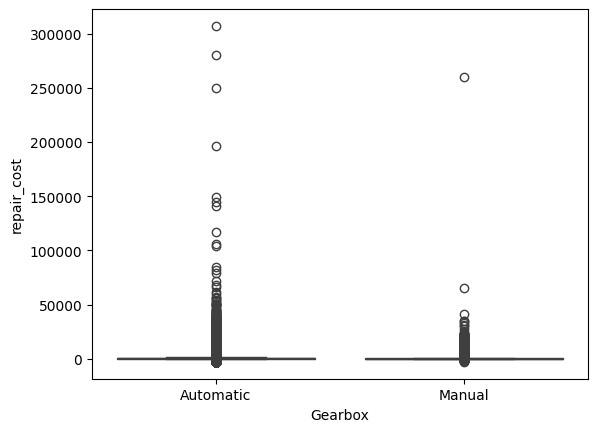

In [113]:
sns.boxplot(x=bd['Gearbox'], y=bd['repair_cost'])

<Axes: xlabel='count', ylabel='Gearbox'>

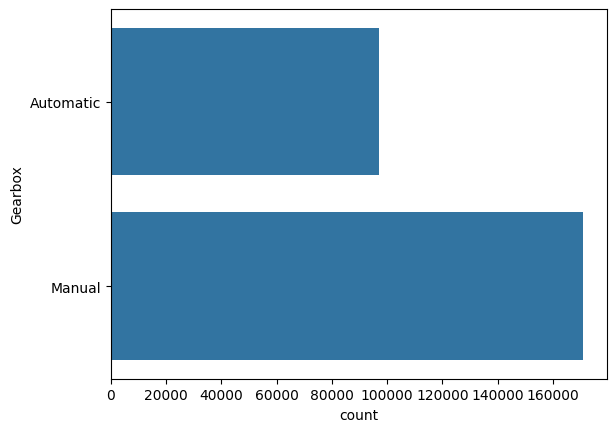

In [114]:
sns.countplot(bd['Gearbox'])

In [115]:
df.printSchema()

root
 |-- Maker: string (nullable = true)
 |--  Genmodel: string (nullable = true)
 |--  Genmodel_ID: string (nullable = true)
 |-- Adv_year: integer (nullable = true)
 |-- Adv_month: integer (nullable = true)
 |-- Color: string (nullable = true)
 |-- Reg_year: double (nullable = true)
 |-- Bodytype: string (nullable = true)
 |-- Runned_Miles: string (nullable = true)
 |-- Engin_size: string (nullable = true)
 |-- Gearbox: string (nullable = true)
 |-- Fuel_type: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Seat_num: double (nullable = true)
 |-- Door_num: double (nullable = true)
 |-- issue: string (nullable = true)
 |-- issue_id: integer (nullable = true)
 |-- Adv_day: integer (nullable = true)
 |-- breakdown_date: date (nullable = true)
 |-- repair_complexity: integer (nullable = true)
 |-- repair_cost: double (nullable = true)
 |-- repair_hours: double (nullable = true)
 |-- repair_date: date (nullable = true)



In [116]:
df_string = spark.read.csv("/proiect/vehicle_claims.csv", inferSchema=False, header=True)
df_string.printSchema()

root
 |-- Maker: string (nullable = true)
 |--  Genmodel: string (nullable = true)
 |--  Genmodel_ID: string (nullable = true)
 |-- Adv_year: string (nullable = true)
 |-- Adv_month: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Reg_year: string (nullable = true)
 |-- Bodytype: string (nullable = true)
 |-- Runned_Miles: string (nullable = true)
 |-- Engin_size: string (nullable = true)
 |-- Gearbox: string (nullable = true)
 |-- Fuel_type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Seat_num: string (nullable = true)
 |-- Door_num: string (nullable = true)
 |-- issue: string (nullable = true)
 |-- issue_id: string (nullable = true)
 |-- Adv_day: string (nullable = true)
 |-- breakdown_date: string (nullable = true)
 |-- repair_complexity: string (nullable = true)
 |-- repair_cost: string (nullable = true)
 |-- repair_hours: string (nullable = true)
 |-- repair_date: string (nullable = true)



In [117]:
Vector = ['Adv_year','Adv_month', 'Reg_year', 'Price', 'Seat_num', 'Door_num', 'issue_id', 'Adv_day', 'repair_complexity', 'repair_cost', 'repair_hours']


In [118]:
from pyspark.sql.types import *

# scriem o functie custom made pentru a converti tipul de date al coloanelor DataFrame-ului
def stingToInteger(df, names, newType):
    for name in names: 
        df = df.withColumn(name, df[name].cast(newType))
    return df

In [119]:
df_string = stingToInteger(df, Vector, IntegerType())
df_string.printSchema()

root
 |-- Maker: string (nullable = true)
 |--  Genmodel: string (nullable = true)
 |--  Genmodel_ID: string (nullable = true)
 |-- Adv_year: integer (nullable = true)
 |-- Adv_month: integer (nullable = true)
 |-- Color: string (nullable = true)
 |-- Reg_year: integer (nullable = true)
 |-- Bodytype: string (nullable = true)
 |-- Runned_Miles: string (nullable = true)
 |-- Engin_size: string (nullable = true)
 |-- Gearbox: string (nullable = true)
 |-- Fuel_type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Seat_num: integer (nullable = true)
 |-- Door_num: integer (nullable = true)
 |-- issue: string (nullable = true)
 |-- issue_id: integer (nullable = true)
 |-- Adv_day: integer (nullable = true)
 |-- breakdown_date: date (nullable = true)
 |-- repair_complexity: integer (nullable = true)
 |-- repair_cost: integer (nullable = true)
 |-- repair_hours: integer (nullable = true)
 |-- repair_date: date (nullable = true)



In [120]:
df.drop('_c0')

DataFrame[Maker: string,  Genmodel: string,  Genmodel_ID: string, Adv_year: int, Adv_month: int, Color: string, Reg_year: double, Bodytype: string, Runned_Miles: string, Engin_size: string, Gearbox: string, Fuel_type: string, Price: double, Seat_num: double, Door_num: double, issue: string, issue_id: int, Adv_day: int, breakdown_date: date, repair_complexity: int, repair_cost: double, repair_hours: double, repair_date: date]

In [121]:
df.select('Gearbox','Fuel_type').show(10)

+---------+---------+
|  Gearbox|Fuel_type|
+---------+---------+
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
|Automatic|   Petrol|
+---------+---------+
only showing top 10 rows



In [122]:
df.show(5)

+-------+---------+------------+--------+---------+------+--------+--------+------------+----------+---------+---------+-------+--------+--------+----------------+--------+-------+--------------+-----------------+------------------+------------+-----------+
|  Maker| Genmodel| Genmodel_ID|Adv_year|Adv_month| Color|Reg_year|Bodytype|Runned_Miles|Engin_size|  Gearbox|Fuel_type|  Price|Seat_num|Door_num|           issue|issue_id|Adv_day|breakdown_date|repair_complexity|       repair_cost|repair_hours|repair_date|
+-------+---------+------------+--------+---------+------+--------+--------+------------+----------+---------+---------+-------+--------+--------+----------------+--------+-------+--------------+-----------------+------------------+------------+-----------+
|Bentley|   Arnage|        10_1|    2018|        4|Silver|  2000.0|  Saloon|       60000|      6.8L|Automatic|   Petrol|21500.0|     5.0|     4.0|Electrical Issue|       4|     12|    2018-04-12|                3|             

In [123]:
df_sel = df.select("Gearbox", "repair_complexity", "repair_cost")
df_sel.show(3)

+---------+-----------------+-----------+
|  Gearbox|repair_complexity|repair_cost|
+---------+-----------------+-----------+
|Automatic|                3|      184.5|
|Automatic|                3|    134.375|
|Automatic|                3|    68.9997|
+---------+-----------------+-----------+
only showing top 3 rows



In [124]:
#analiza descriptiva a unei variabile
print("Cost total reparații:", bd['repair_cost'].sum())
print("Cost minim:", bd['repair_cost'].min())
print("Cost maxim:", bd['repair_cost'].max())
print("Medie cost:", bd['repair_cost'].mean())
print("Mediană cost:", bd['repair_cost'].median())


Cost total reparații: 117915178.13708101
Cost minim: -2998.0
Cost maxim: 307302.9435237476
Medie cost: 440.06246715661075
Mediană cost: 120.4475


In [125]:
#analiza descriptiva a tuturor variabilelor din baza de date
bd.describe()

,Adv_year,Adv_month,Reg_year,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours
count,267951.000000,267951.000000,267951.000000,2.679510e+05,267951.000000,267951.000000,267951.000000,267951.000000,267951.000000,267951.000000,267951.000000
mean,2018.127997,5.626215,2012.707570,1.325693e+04,5.142026,4.300965,0.500625,14.530769,1.360809,440.062467,62.255709
std,0.747601,2.091065,4.464612,3.998111e+04,1.822196,1.143101,1.136547,8.066906,0.724740,1931.753426,798.363583
min,2012.000000,1.000000,1900.000000,-6.997630e+05,1.000000,0.000000,0.000000,1.000000,1.000000,-2998.000000,-29.000000
25%,2018.000000,4.000000,2010.000000,4.980000e+03,5.000000,4.000000,0.000000,8.000000,1.000000,40.698250,1.000000
50%,2018.000000,5.000000,2014.000000,9.275000e+03,5.000000,5.000000,0.000000,15.000000,1.000000,120.447500,2.000000
75%,2018.000000,7.000000,2016.000000,1.700000e+04,5.000000,5.000000,0.000000,22.000000,1.000000,330.000000,6.000000
max,2021.000000,33.000000,2019.000000,9.999999e+06,20.000000,7.000000,5.000000,28.000000,4.000000,307302.943524,174694.840042


In [126]:
#analiza descriptiva a unei singure variabile din baza de date 
df.describe('repair_cost').show()

+-------+-----------------+
|summary|      repair_cost|
+-------+-----------------+
|  count|           267951|
|   mean|440.0624671565676|
| stddev|1931.753426125156|
|    min|          -2998.0|
|    max|307302.9435237476|
+-------+-----------------+



In [127]:
df.crosstab('Maker', 'Gearbox').sort("Maker_Gearbox").show()

+-------------+---------+------+
|Maker_Gearbox|Automatic|Manual|
+-------------+---------+------+
|       Abarth|       53|   363|
|   Alfa Romeo|      360|   759|
| Aston Martin|      108|     9|
|         Audi|    12469| 10041|
|          BMW|    12948|  4228|
|      Bentley|     1094|     0|
|       Brooke|        0|     1|
|      Bugatti|        2|     0|
|     Cadillac|        6|     1|
|     Caterham|        0|     3|
|    Chevrolet|      137|   575|
|     Chrysler|      222|   150|
|      Citroen|     1623|  7657|
|     Corvette|        1|     2|
|          DAX|        0|     1|
|           DS|      110|   558|
|        Dacia|       23|  1718|
|       Daewoo|        3|    16|
|     Daihatsu|       10|    76|
|      Daimler|        1|     0|
+-------------+---------+------+
only showing top 20 rows



In [128]:
nr_veh =df.filter(df.repair_cost < 100).count()
print(nr_veh, "de vehicule au costul de reparatie < 100")

123365 de vehicule au costul de reparatie < 100


In [129]:
df.groupby('Maker').agg({'repair_cost': 'mean'}).show()

+-------------+------------------+
|        Maker|  avg(repair_cost)|
+-------------+------------------+
|      Peugeot|234.47540124274545|
|        Rover| 275.5019851993408|
|  Rolls-Royce|   3746.2701395489|
|   Mitsubishi|  402.976378734956|
|        SKODA| 322.1374039708414|
|      Perodua|            91.251|
|      Sebring|            56.797|
|       Proton|134.63773447052662|
|         Saab|  248.704211412531|
|      Pilgrim|           57.9955|
|         SEAT| 348.5057163508657|
|         Audi| 530.5035081466747|
|          TVR| 2221.559553028695|
|      Santana|              22.7|
|Mercedes-Benz| 600.1466909606606|
|      McLaren|4743.9066683131505|
|    Ssangyong|502.01061571568385|
|      Renault|249.70326399368022|
|         Reva|           40.5985|
|        Noble|           140.735|
+-------------+------------------+
only showing top 20 rows



In [130]:
import numpy as np
vehicles_coefficient = np.corrcoef(bd.repair_cost, bd.Price)
print("Coeficientul de corelatie dintre repair_cost si Price este: \n", vehicles_coefficient)

Coeficientul de corelatie dintre repair_cost si Price este: 
 [[1.         0.24679968]
 [0.24679968 1.        ]]


In [131]:
#impartirea bazei de date
train_data, test_data = df.randomSplit([0.7, 0.3], seed=7)
print(f"Train set length: {train_data.count()} records")
print(f"Test set length: {test_data.count()} records")

Train set length: 187643 records


[Stage 198:===================>                                     (1 + 2) / 3]

Test set length: 80308 records


In [132]:
#afisare primele 5 valori pt bd de training
train_data.show(5)

[Stage 201:>                                                        (0 + 1) / 1]

+------+----------+------------+--------+---------+-----+--------+-----------+------------+----------+---------+---------+-------+--------+--------+------------------+--------+-------+--------------+-----------------+------------------+------------+-----------+
| Maker|  Genmodel| Genmodel_ID|Adv_year|Adv_month|Color|Reg_year|   Bodytype|Runned_Miles|Engin_size|  Gearbox|Fuel_type|  Price|Seat_num|Door_num|             issue|issue_id|Adv_day|breakdown_date|repair_complexity|       repair_cost|repair_hours|repair_date|
+------+----------+------------+--------+---------+-----+--------+-----------+------------+----------+---------+---------+-------+--------+--------+------------------+--------+-------+--------------+-----------------+------------------+------------+-----------+
|Abarth|124 Spider|         2_1|    2017|        4| Grey|  2017.0|Convertible|        1000|      1.4L|Automatic|   Petrol|22890.0|     2.0|     2.0|      Engine Issue|       2|     17|    2017-04-17|               

In [133]:
train_data.groupBy("Gearbox").count().show()

[Stage 202:>                                                        (0 + 3) / 3]

+---------+------+
|  Gearbox| count|
+---------+------+
|Automatic| 67975|
|   Manual|119668|
+---------+------+



In [134]:
#construim data processing pipeline
### exemplu de encoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler

In [135]:
stringIndexer = StringIndexer(inputCol="Gearbox", outputCol="Gearbox_encoded")
model = stringIndexer.fit(df)
indexed = model.transform(df)
encoder = OneHotEncoder(dropLast=False, inputCol="Gearbox_encoded", outputCol="Gearbox_vec")

In [136]:
ohe = encoder.fit(indexed)
encoded = ohe.transform(indexed)
encoded.show(10)

+-------+---------+------------+--------+---------+------+--------+--------+------------+----------+---------+---------+-------+--------+--------+----------------+--------+-------+--------------+-----------------+------------------+------------+-----------+---------------+-------------+
|  Maker| Genmodel| Genmodel_ID|Adv_year|Adv_month| Color|Reg_year|Bodytype|Runned_Miles|Engin_size|  Gearbox|Fuel_type|  Price|Seat_num|Door_num|           issue|issue_id|Adv_day|breakdown_date|repair_complexity|       repair_cost|repair_hours|repair_date|Gearbox_encoded|  Gearbox_vec|
+-------+---------+------------+--------+---------+------+--------+--------+------------+----------+---------+---------+-------+--------+--------+----------------+--------+-------+--------------+-----------------+------------------+------------+-----------+---------------+-------------+
|Bentley|   Arnage|        10_1|    2018|        4|Silver|  2000.0|  Saloon|       60000|      6.8L|Automatic|   Petrol|21500.0|     5.0

In [137]:
###### CONSTRUIM PIPELINE-UL ######
# 1. Encode the categorical data (facem encoding variabilelor categoriale)
from pyspark.ml import Pipeline
#from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.ml.feature import OneHotEncoder

CATE_FEATURES = ['Maker', 'Gearbox', 'Bodytype', 'Color', 'issue', 'Fuel_type', 'Runned_Miles']
stages = [] # stages in our Pipeline
for categoricalCol in CATE_FEATURES:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()],
                                     outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

In [138]:
label_stringIdx =  StringIndexer(inputCol="Gearbox", outputCol="newGearbox")
stages += [label_stringIdx]

In [139]:

assemblerInputs = [c + "classVec" for c in CATE_FEATURES] + Vector

In [140]:
#punem totul laolalta in VectorAssembler
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [141]:
#aici impingem datele in Pipeline
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer

# Create a Pipeline.
pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df)
model = pipelineModel.transform(df)

In [142]:
model.take(1)

25/06/04 05:29:16 WARN DAGScheduler: Broadcasting large task binary with size 2.2 MiB


[Row(Maker='Bentley',  Genmodel='Arnage',  Genmodel_ID='10_1', Adv_year=2018, Adv_month=4, Color='Silver', Reg_year=2000.0, Bodytype='Saloon', Runned_Miles='60000', Engin_size='6.8L', Gearbox='Automatic', Fuel_type='Petrol', Price=21500.0, Seat_num=5.0, Door_num=4.0, issue='Electrical Issue', issue_id=4, Adv_day=12, breakdown_date=datetime.date(2018, 4, 12), repair_complexity=3, repair_cost=184.5, repair_hours=6.0, repair_date=datetime.date(2018, 4, 13), MakerIndex=30.0, MakerclassVec=SparseVector(85, {30: 1.0}), GearboxIndex=1.0, GearboxclassVec=SparseVector(1, {}), BodytypeIndex=2.0, BodytypeclassVec=SparseVector(17, {2: 1.0}), ColorIndex=1.0, ColorclassVec=SparseVector(22, {1: 1.0}), issueIndex=6.0, issueclassVec=SparseVector(14, {6: 1.0}), Fuel_typeIndex=1.0, Fuel_typeclassVec=SparseVector(13, {1: 1.0}), Runned_MilesIndex=3.0, Runned_MilesclassVec=SparseVector(73408, {3: 1.0}), newGearbox=1.0, features=SparseVector(73571, {30: 1.0, 88: 1.0, 104: 1.0, 131: 1.0, 140: 1.0, 155: 1.0, 7